In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

data = np.load("/home/roland/Schreibtisch/nonlinear/Project/nonlinear/ECG/data/ecg.npy", allow_pickle=True)
labels = np.load("/home/roland/Schreibtisch/nonlinear/Project/nonlinear/ECG/data/y.npy", allow_pickle=True)

In [10]:
for i in range(12):
    data[i] = StandardScaler().fit_transform(data_[i])

In [6]:
print(data[0].shape)
print(labels)

(7500, 12)
[6 3 0 ... 2 0 5]


In [8]:
ffts = []
for ecg_ in data:
    fft = np.fft.rfft(ecg_, axis=0)
    fft = np.abs(fft)
    ffts.append(fft)

n = {}
for i in range(len(ffts)):
    n[i] = len(ffts[i])
timestep = 1/500
# plot example-fft on random ecg on random channel


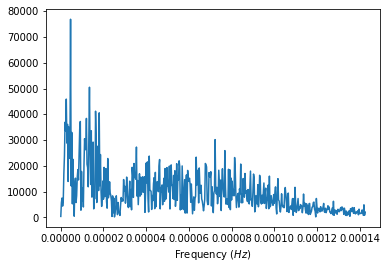

In [9]:
t = {}
for i in range(len(ffts)):
    t[i] = np.linspace(0, timestep/2, n[i], endpoint=True)

patient = 5
plt.plot(t[patient][:500], ffts[patient][:,0][:500])
plt.xlabel('Frequency ($Hz$)')
#print(t[0])
#print(ffts[0][:,0])
#new = (t[0], ffts[0][:,0])
#print(new)
for fft in ffts:
    new = (t, fft[:,0])



In [ ]:
import progressbar
size = 1000
args = []
patient = np.zeros((len(ffts), size*12))
for j in range(len(ffts)):
    patient[j] = np.append(args, ffts[j][:][:size].T)

In [97]:
print(np.array_equal(patient[0], np.append(args, ffts[0][:][:size].T)))

True


In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

perp = 45
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(patient)
pca_tsne = TSNE(n_components = 2, perplexity = perp).fit_transform(  pca_result_50 )

In [ ]:
import pylab as plot
params = {'legend.fontsize': 50,
          'legend.handlelength': 1}
plot.rcParams.update(params)

fig, ax = plt.subplots(figsize = (50,50))
for i in np.unique(labels):    
    m = np.where(labels == i)
    ax.scatter(pca_tsne[m,0], pca_tsne[m,1], label = i, s = 300)
ax.set_ylabel('Feature 2', fontsize = 100.0)
ax.set_xlabel('Feature 1', fontsize = 100.0)
ax.legend()
ax.set_yticklabels([])
ax.set_xticklabels([])

plt.savefig("plots/fourier_ecg_%d*12features_perp%d.png"%(size,perp))
plt.show()

In [ ]:
pca_tsne_3d = TSNE(n_components = 3, perplexity = perp).fit_transform(  pca_result_50 )

In [ ]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(pca_tsne_3d[:,0], pca_tsne_3d[:,1], pca_tsne_3d[:,2], c = labels)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [29]:
import progressbar
from scipy import signal

size = 1000
psd = np.zeros((len(data), 129*12))
x = np.zeros((len(data), 129*12))
for j in progressbar.progressbar(range(len(data))):
    c = []
    d = []
    for i in range(12):
        a, b = signal.welch(data[j][:,i])
        c = np.append(c, b)
        d = np.append(d, a)
    psd[j] = c
    x[j] = d
    

100% (6877 of 6877) |####################| Elapsed Time: 0:01:11 Time:  0:01:11


In [30]:
#freqs, psd = signal.welch(data[0][0])
#print(x[0].shape, psd[0].shape)
#plt.semilogx(x[0][14:21], psd[0][14:21])
f, g = signal.welch(data[500][:,0])
#plt.semilogx(f, g)
#print(g.shape)
print(np.array_equal(f, x[500][0:129]), np.array_equal(g, psd[500][0:129]))

True True


In [50]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

perp = 50
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(psd)
pca_tsne = TSNE(n_components = 2, perplexity = perp, n_iter = 1000).fit_transform(pca_result_50)

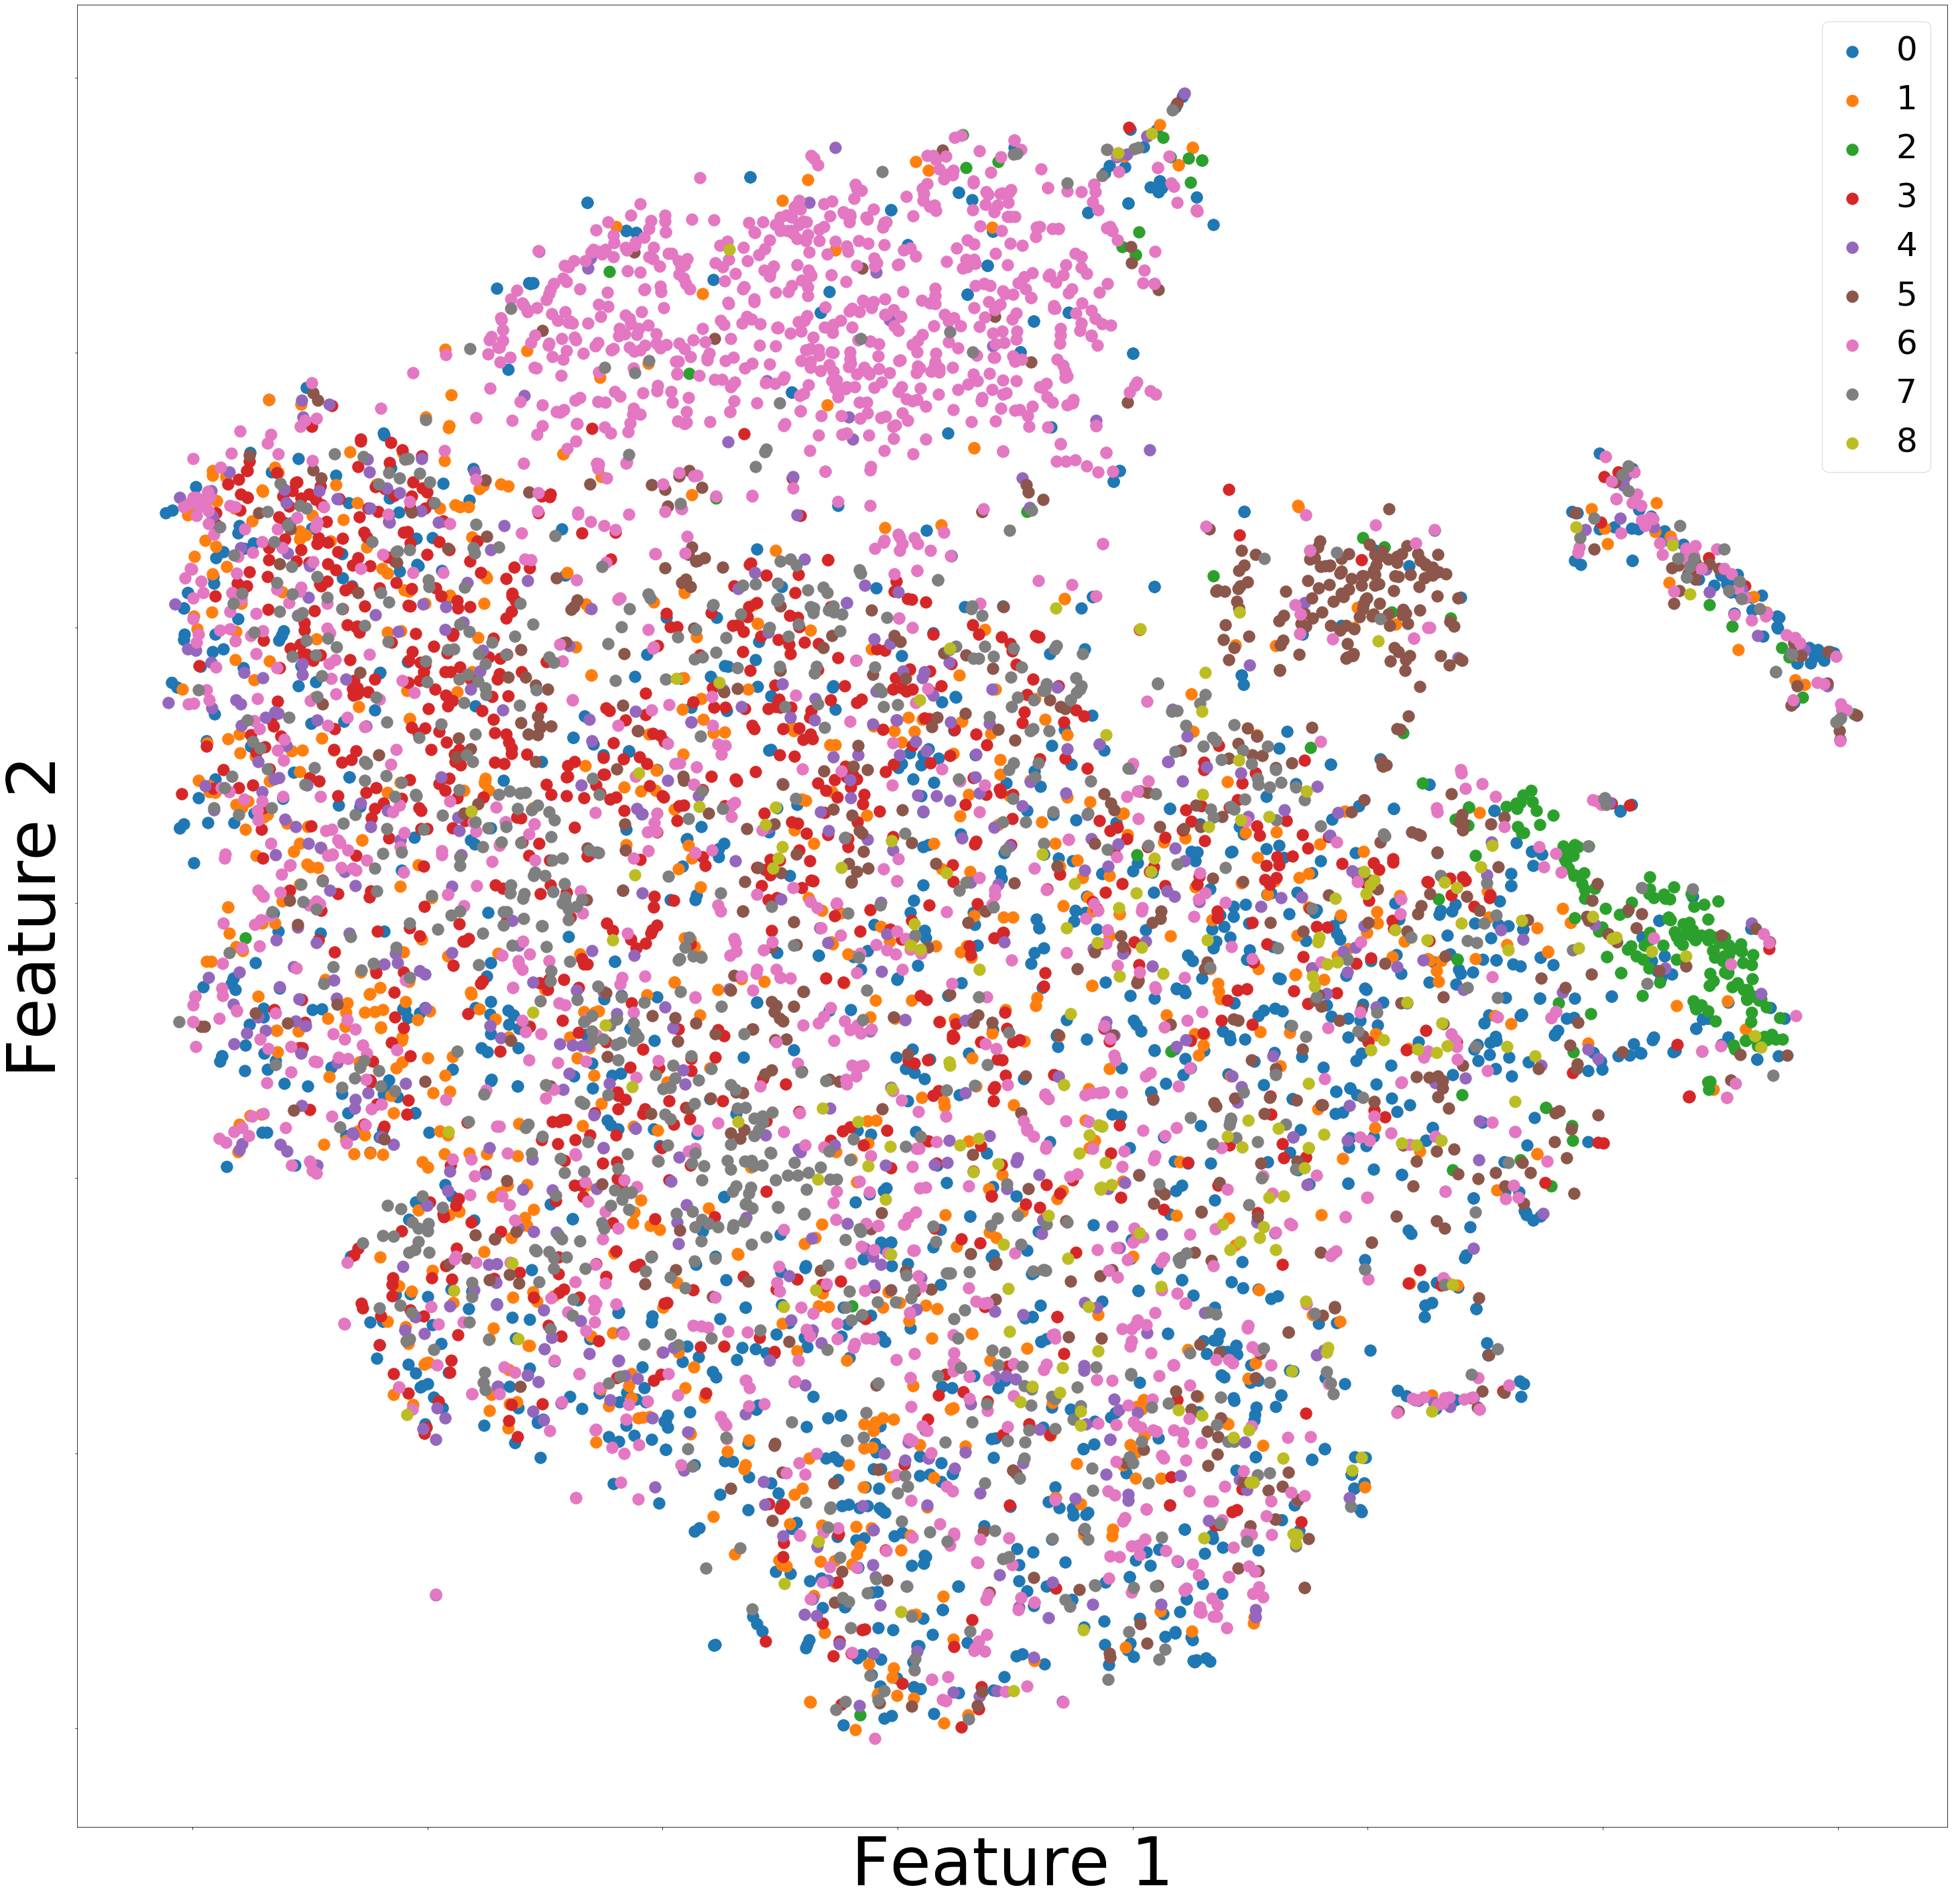

In [51]:
import pylab as plot
params = {'legend.fontsize': 50,
          'legend.handlelength': 1}
plot.rcParams.update(params)

fig, ax = plt.subplots(figsize = (50,50))
for i in np.unique(labels):    
    m = np.where(labels == i)
    ax.scatter(pca_tsne[m,0], pca_tsne[m,1], label = i, s = 300)
ax.set_ylabel('Feature 2', fontsize = 100.0)
ax.set_xlabel('Feature 1', fontsize = 100.0)
ax.legend()
ax.set_yticklabels([])
ax.set_xticklabels([])

plt.savefig("plots/psd_ecg_129*12features_perp%d.png"%perp)
plt.show()

In [54]:
pca_tsne_3d = TSNE(n_components = 3, perplexity = perp).fit_transform(  pca_result_50 )

<IPython.core.display.Javascript object>


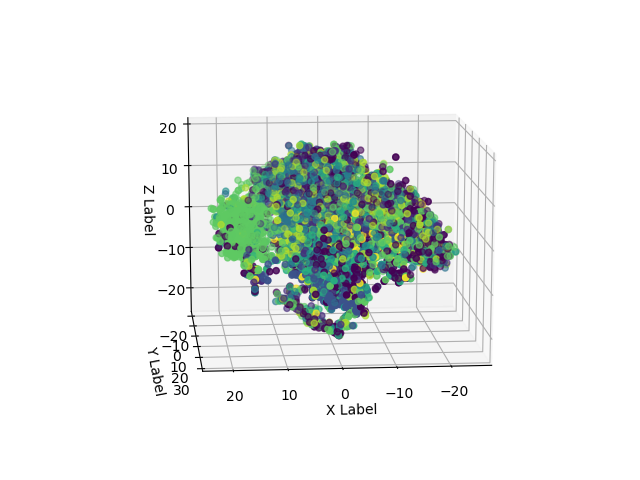

In [55]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(pca_tsne_3d[:,0], pca_tsne_3d[:,1], pca_tsne_3d[:,2], c = labels)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()